Tracking the gradients using the Hessian

# SVRG

In [3]:
import constants
from get_data import AllData
from svrm import SVRG, CM
import matplotlib.pyplot as plt

In [4]:
all_data = AllData(constants.NBR_SAMPLES, constants.NBR_FEATURES)

In [5]:
my_svrg = SVRG(all_data.A, all_data.b, constants.NBR_EPOCH, constants.NBR_UPDATES, constants.INITIAL_LEARNING_RATE)

In [6]:
my_svrg.train()

0
999
1998
2997
3996
4995
5994
6993
7992
8991
9990
10989
11988
12987
13986
14985
15984
16983
17982
18981
19980
20979
21978
22977
23976
24975
25974
26973
27972
28971
29970
30969
31968
32967
33966
34965
35964
36963
37962
38961
39960
40959
41958
42957
43956
44955
45954
46953
47952
48951
49950
50949
51948
52947
53946
54945
55944
56943
57942
58941
59940
60939
61938
62937
63936
64935
65934
66933
67932
68931
69930
70929
71928
72927
73926
74925
75924
76923
77922
78921
79920
80919
81918
82917
83916
84915
85914
86913
87912
88911
89910
90909
91908
92907
93906
94905
95904
96903
97902
98901
99900


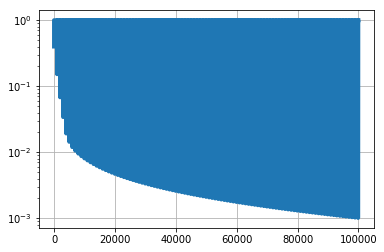

In [9]:
plt.plot(my_svrg.grad_history, label='SVRG', lw=4)
plt.grid()
plt.yscale('log')
plt.show()

# Curvature Matching

In [7]:
my_cm = CM(all_data.A, all_data.b, constants.NBR_EPOCH, constants.NBR_UPDATES, constants.INITIAL_LEARNING_RATE, constants.RANK_S)

In [8]:
my_cm.train(True)

TypingError: Failed at nopython (nopython frontend)
np.dot() arguments must all have the same dtype
[1] During: resolving callee type: Function(<built-in function dot>)
[2] During: typing of call at /Users/SPALLA/Documents/GitHub/sto_opt_svrg/gradient_tool.py (112)

In [ ]:
plt.plot(my_cm.grad_history, label='CM')
plt.grid()
plt.yscale('log')
plt.show()

In [ ]:
plt.plot(my_svrg.loss_history, lw=4, label='SVRG')
plt.plot(my_cm.loss_history, lw=4, label='CM')
plt.grid()
plt.legend()
plt.yscale('log')
plt.ylabel('Function suboptimality')
plt.xlabel('Number of epochs')
plt.show()

In [ ]:
print(my_svrg.loss_history[10])
print(my_cm.loss_history[10])

In [11]:
from numba import njit
@njit(parallel=True)
def mat_mul_jit(mat1, mat2):
    return np.dot(mat1, mat2)


@njit(parallel=True)
def mat_add_jit(mat1, mat2):
    return mat1 + mat2


In [14]:
import numpy as np
aa = np.random.normal(size=(1000, 1000))
bb = np.random.normal(size=(1000, 1000))

In [15]:
%%time
aa.dot(bb)

CPU times: user 68.9 ms, sys: 4.82 ms, total: 73.7 ms
Wall time: 33.4 ms


array([[ 77.05691545, -31.51033394, -65.13186801, ...,  -7.01552675,
        -45.22262312,  51.3860548 ],
       [ -7.10695818,   8.93608516,  -9.38881148, ...,  34.8636302 ,
        -32.18669317, -47.01692051],
       [ -8.6888073 ,  33.00794971,  12.86272632, ...,  17.94033797,
        -29.3647798 ,   6.33936906],
       ..., 
       [-41.64964949, -51.69731698,   9.07057527, ...,   9.27133831,
         -5.50592482,  53.53317235],
       [-52.20701694,  -7.64768911,  54.61879637, ...,  -4.58884087,
         39.38489165, -66.72553217],
       [-31.37339532, -41.81614852, -23.52533138, ..., -24.25747545,
        -59.16311636,  39.73809296]])

In [ ]:
mat_mul_jit(aa, )